# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from statsmodels.gam.api import GLMGam, BSplines
import statsmodels.api as sm
import pygam
import opendatasets as od
import plotly.express as px
from sklearn.neighbors import KNeighborsRegressor
import plotly.graph_objects as go
import random
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import re
import warnings

The dataset includes Spotify Top 200 Weekly Charts from 2020-2021. 

In [2]:
data = pd.read_csv("trainingdata.csv")

# EDA

We will include valence, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, tempo, duration_ms, time_signature. These metrics are determined by Spotify. Below are the definitions of each metric.

Refer to: https://medium.com/@boplantinga/what-do-spotifys-audio-features-tell-us-about-this-year-s-eurovision-song-contest-66ad188e112a


**1. Valence:** The musical "positivity" of the song. Tracks with high valence scores elicit greater feelings of happiness, cheerfulness, and euphoria. Tracks with low valence scores elicit feelings of sadness, depression, and anger.

**2. danceability:** How suitable a song is for dancing. This score is comprised of elements including tempo, rhythm, stability, beat strength, and regularity. A low score indicates worse danceability, a higher score indicates better danceability.

**3. energy:** The energy of a song, measuring intensity and activity. Lower scores indicate lower energy, higher scores indicate higher energy. 

**4. key:** The key signature of the song. The key of C maps to a value of 0, and this increases incrementally by half steps. The key of B maps to a value of 11.

**5. mode:** Whether the key signature is major or minor.

**6. loudness:** The loudness of a song in decibels. The loudness value is averaged across an entire song. They usually range from -60 dB to 0 dB.

**7. acousticness:** Measures if a track is acoustic. Values range from 0.0 to 1.0.

**8. speechiness:** Measures if there are spoken words. The more talking or "speech-like" sounds in a song, the higher the value is (from 0 to 1).

**9. instrumentalness:** Predicts if a song contains no vocals. A score of 1 indicates no vocals, and a score of 0 indicates all vocals. 

**10. liveness:** Detects if a song has a live audience in the recording. High scores indicate a greater likelihood that the song was performed live.

**11. tempo:** The overall estimated tempo of the track in BPM (beats per minute). The speed of the song.

**12. duration_ms:** The duration of the song in milliseconds

**13. time_signature:** The musical time signature of the song. Represented by "a fraction with the denominator defining the beat as a division of a whole note and the numerator giving the number of beats in each bar".

In [3]:
data.columns

Index(['Unnamed: 0', 'Index', 'Highest Charting Position',
       'Number of Times Charted', 'Week of Highest Charting', 'Song Name',
       'Streams', 'Artist', 'Artist Followers', 'Song ID', 'Genre',
       'Release Date', 'Weeks Charted', 'Popularity', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo',
       'Duration (ms)', 'Valence', 'Chord', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'title', 'artist'],
      dtype='object')

In [4]:
data = data.drop(columns = ['Artist', 'Song Name', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)'])

## Danceability

(array([  4.,  10.,  49.,  83., 142., 249., 336., 372., 240.,  69.]),
 array([0.15 , 0.233, 0.316, 0.399, 0.482, 0.565, 0.648, 0.731, 0.814,
        0.897, 0.98 ]),
 <BarContainer object of 10 artists>)

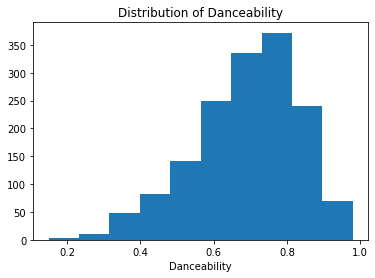

In [5]:
plt.xlabel('Danceability')
plt.title('Distribution of Danceability')
plt.hist(data['danceability'])

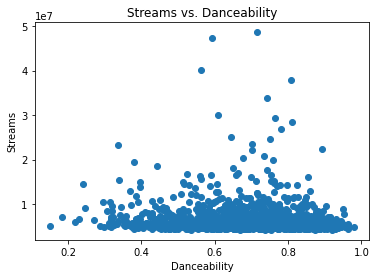

In [57]:
plt.xlabel('Danceability')
plt.ylabel('Streams')
plt.title('Streams vs. Danceability')
plt.scatter(data['danceability'], data['Streams'])

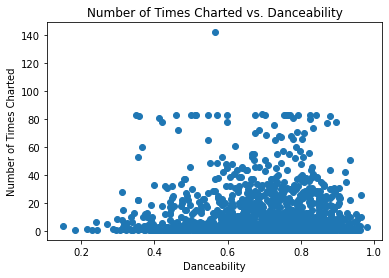

In [6]:
plt.xlabel('Danceability')
plt.ylabel('Number of Times Charted')
plt.title('Number of Times Charted vs. Danceability')
plt.scatter(data['danceability'], data['Number of Times Charted'])

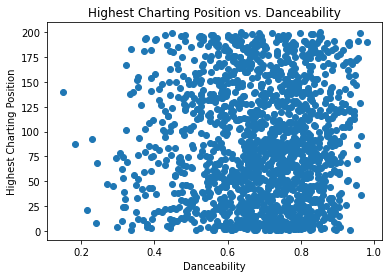

In [7]:
plt.xlabel('Danceability')
plt.ylabel('Highest Charting Position')
plt.title('Highest Charting Position vs. Danceability')
plt.scatter(data['danceability'], data['Highest Charting Position'])

## Energy

(array([  8.,  16.,  44.,  84., 170., 291., 369., 287., 208.,  77.]),
 array([0.054 , 0.1456, 0.2372, 0.3288, 0.4204, 0.512 , 0.6036, 0.6952,
        0.7868, 0.8784, 0.97  ]),
 <BarContainer object of 10 artists>)

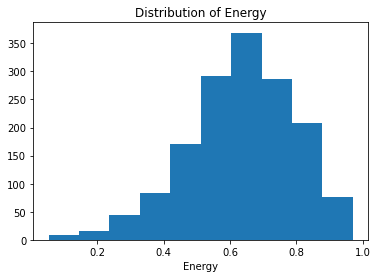

In [8]:
plt.xlabel('Energy')
plt.title('Distribution of Energy')
plt.hist(data['energy'])

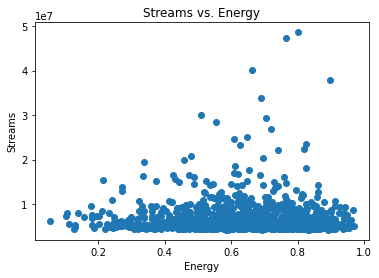

In [58]:
plt.xlabel('Energy')
plt.ylabel('Streams')
plt.title('Streams vs. Energy')
plt.scatter(data['energy'], data['Streams'])

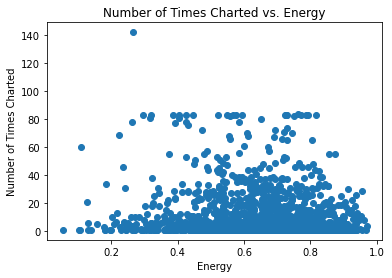

In [9]:
plt.xlabel('Energy')
plt.ylabel('Number of Times Charted')
plt.title('Number of Times Charted vs. Energy')
plt.scatter(data['energy'], data['Number of Times Charted'])

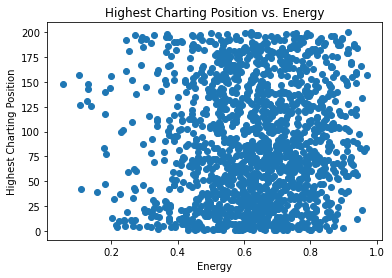

In [10]:
plt.xlabel('Energy')
plt.ylabel('Highest Charting Position')
plt.title('Highest Charting Position vs. Energy')
plt.scatter(data['energy'], data['Highest Charting Position'])

## Key Signature

(array([376., 126.,  40., 110., 129., 122., 141., 127., 120., 263.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

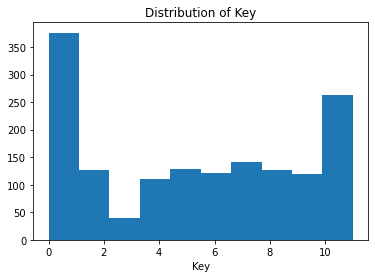

In [11]:
plt.xlabel('Key')
plt.title('Distribution of Key')
plt.hist(data['key'])

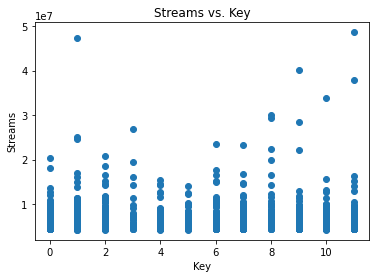

In [59]:
plt.xlabel('Key')
plt.ylabel('Streams')
plt.title('Streams vs. Key')
plt.scatter(data['key'], data['Streams'])

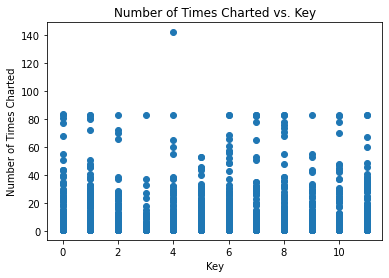

In [12]:
plt.xlabel('Key')
plt.ylabel('Number of Times Charted')
plt.title('Number of Times Charted vs. Key')
plt.scatter(data['key'], data['Number of Times Charted'])

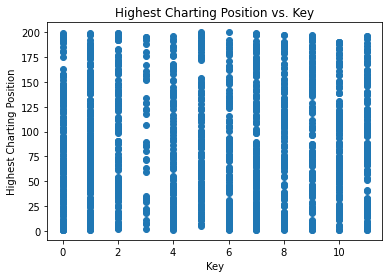

In [13]:
plt.xlabel('Key')
plt.ylabel('Highest Charting Position')
plt.title('Highest Charting Position vs. Key')
plt.scatter(data['key'], data['Highest Charting Position'])

## Loudness

(array([  2.,   1.,   3.,  14.,  28., 113., 489., 722., 180.,   2.]),
 array([-25.166 , -22.4985, -19.831 , -17.1635, -14.496 , -11.8285,
         -9.161 ,  -6.4935,  -3.826 ,  -1.1585,   1.509 ]),
 <BarContainer object of 10 artists>)

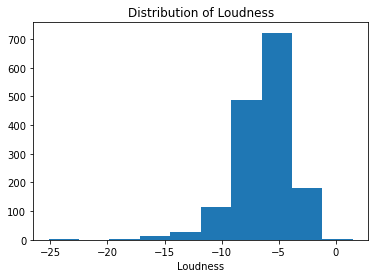

In [14]:
plt.xlabel('Loudness')
plt.title('Distribution of Loudness')
plt.hist(data['loudness'])

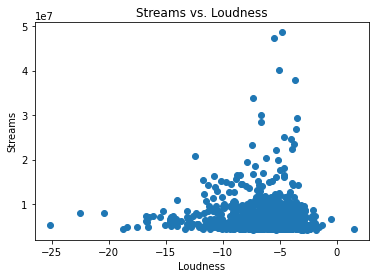

In [60]:
plt.xlabel('Loudness')
plt.ylabel('Streams')
plt.title('Streams vs. Loudness')
plt.scatter(data['loudness'], data['Streams'])

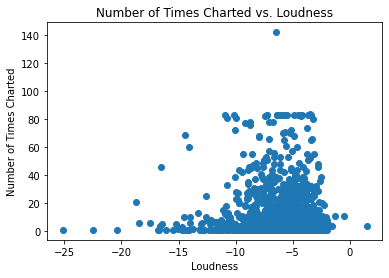

In [15]:
plt.xlabel('Loudness')
plt.ylabel('Number of Times Charted')
plt.title('Number of Times Charted vs. Loudness')
plt.scatter(data['loudness'], data['Number of Times Charted'])

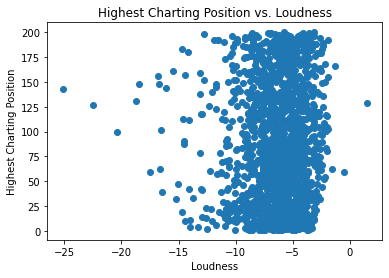

In [16]:
plt.xlabel('Loudness')
plt.ylabel('Highest Charting Position')
plt.title('Highest Charting Position vs. Loudness')
plt.scatter(data['loudness'], data['Highest Charting Position'])

## Mode

(array([675.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 879.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

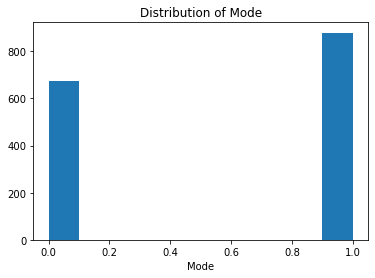

In [17]:
plt.xlabel('Mode')
plt.title('Distribution of Mode')
plt.hist(data['mode'])

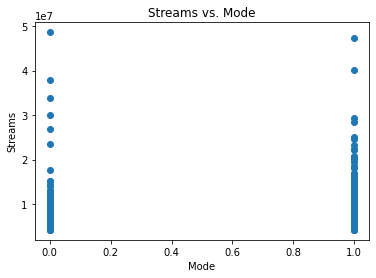

In [61]:
plt.xlabel('Mode')
plt.ylabel('Streams')
plt.title('Streams vs. Mode')
plt.scatter(data['mode'], data['Streams'])

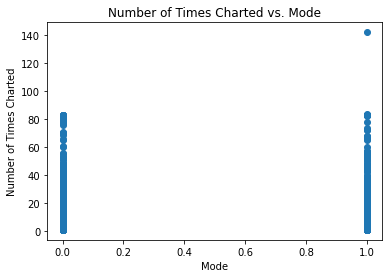

In [18]:
plt.xlabel('Mode')
plt.ylabel('Number of Times Charted')
plt.title('Number of Times Charted vs. Mode')
plt.scatter(data['mode'], data['Number of Times Charted'])

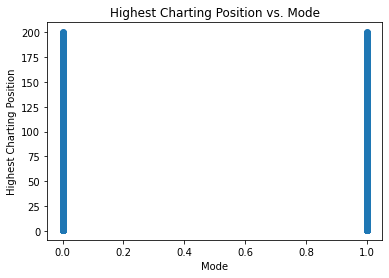

In [19]:
plt.xlabel('Mode')
plt.ylabel('Highest Charting Position')
plt.title('Highest Charting Position vs. Mode')
plt.scatter(data['mode'], data['Highest Charting Position'])

## Speechiness

(array([973., 241., 148., 124.,  51.,  12.,   2.,   0.,   2.,   1.]),
 array([0.0232 , 0.10928, 0.19536, 0.28144, 0.36752, 0.4536 , 0.53968,
        0.62576, 0.71184, 0.79792, 0.884  ]),
 <BarContainer object of 10 artists>)

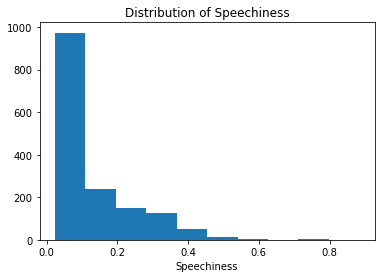

In [20]:
plt.xlabel('Speechiness')
plt.title('Distribution of Speechiness')
plt.hist(data['speechiness'])

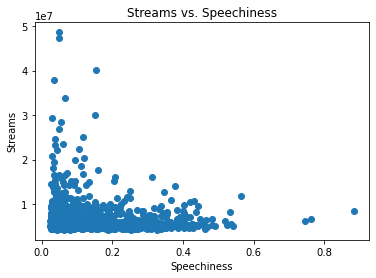

In [62]:
plt.xlabel('Speechiness')
plt.ylabel('Streams')
plt.title('Streams vs. Speechiness')
plt.scatter(data['speechiness'], data['Streams'])

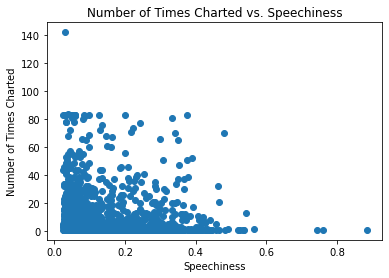

In [21]:
plt.xlabel('Speechiness')
plt.ylabel('Number of Times Charted')
plt.title('Number of Times Charted vs. Speechiness')
plt.scatter(data['speechiness'], data['Number of Times Charted'])

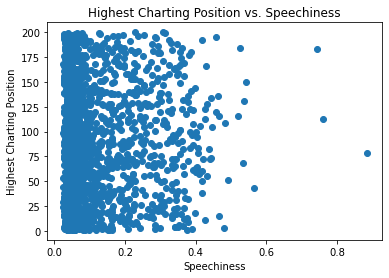

In [22]:
plt.xlabel('Speechiness')
plt.ylabel('Highest Charting Position')
plt.title('Highest Charting Position vs. Speechiness')
plt.scatter(data['speechiness'], data['Highest Charting Position'])

## Acousticness

(array([587., 290., 182., 128., 106.,  74.,  54.,  48.,  52.,  33.]),
 array([2.5500000e-05, 9.9422950e-02, 1.9882040e-01, 2.9821785e-01,
        3.9761530e-01, 4.9701275e-01, 5.9641020e-01, 6.9580765e-01,
        7.9520510e-01, 8.9460255e-01, 9.9400000e-01]),
 <BarContainer object of 10 artists>)

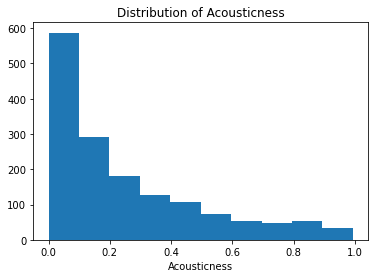

In [23]:
plt.xlabel('Acousticness')
plt.title('Distribution of Acousticness')
plt.hist(data['acousticness'])

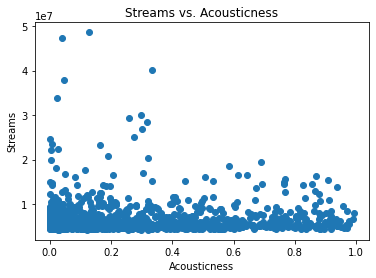

In [63]:
plt.xlabel('Acousticness')
plt.ylabel('Streams')
plt.title('Streams vs. Acousticness')
plt.scatter(data['acousticness'], data['Streams'])

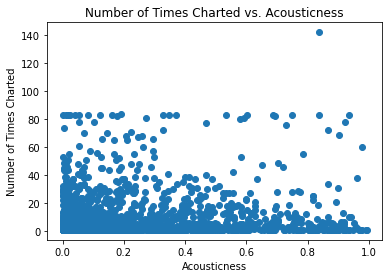

In [24]:
plt.xlabel('Acousticness')
plt.ylabel('Number of Times Charted')
plt.title('Number of Times Charted vs. Acousticness')
plt.scatter(data['acousticness'], data['Number of Times Charted'])

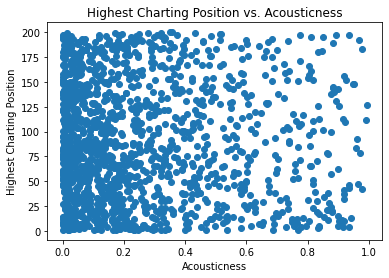

In [25]:
plt.xlabel('Acousticness')
plt.ylabel('Highest Charting Position')
plt.title('Highest Charting Position vs. Acousticness')
plt.scatter(data['acousticness'], data['Highest Charting Position'])

## Instrumentalness

(array([1.508e+03, 1.800e+01, 6.000e+00, 6.000e+00, 3.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 4.000e+00, 3.000e+00]),
 array([0.    , 0.0915, 0.183 , 0.2745, 0.366 , 0.4575, 0.549 , 0.6405,
        0.732 , 0.8235, 0.915 ]),
 <BarContainer object of 10 artists>)

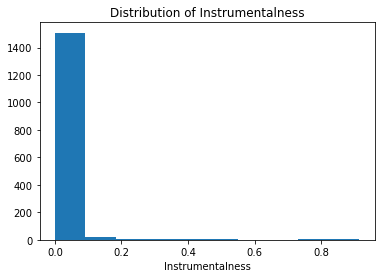

In [26]:
plt.xlabel('Instrumentalness')
plt.title('Distribution of Instrumentalness')
plt.hist(data['instrumentalness'])

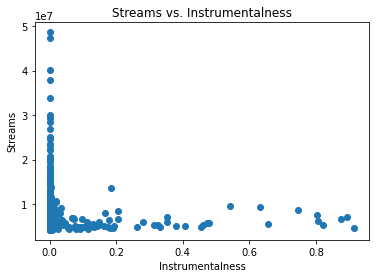

In [64]:
plt.xlabel('Instrumentalness')
plt.ylabel('Streams')
plt.title('Streams vs. Instrumentalness')
plt.scatter(data['instrumentalness'], data['Streams'])

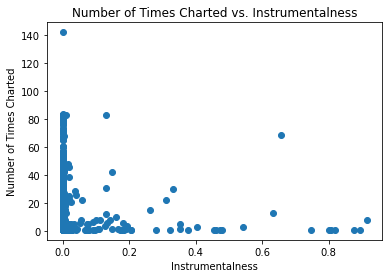

In [27]:
plt.xlabel('Instrumentalness')
plt.ylabel('Number of Times Charted')
plt.title('Number of Times Charted vs. Instrumentalness')
plt.scatter(data['instrumentalness'], data['Number of Times Charted'])

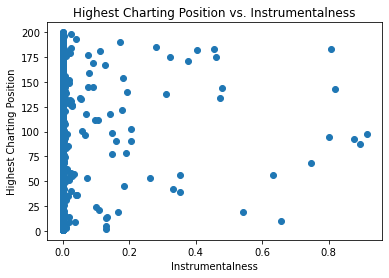

In [28]:
plt.xlabel('Instrumentalness')
plt.ylabel('Highest Charting Position')
plt.title('Highest Charting Position vs. Instrumentalness')
plt.scatter(data['instrumentalness'], data['Highest Charting Position'])

## Liveness

(array([664., 483., 167., 137.,  35.,  19.,  17.,  16.,   7.,   9.]),
 array([0.0197 , 0.11393, 0.20816, 0.30239, 0.39662, 0.49085, 0.58508,
        0.67931, 0.77354, 0.86777, 0.962  ]),
 <BarContainer object of 10 artists>)

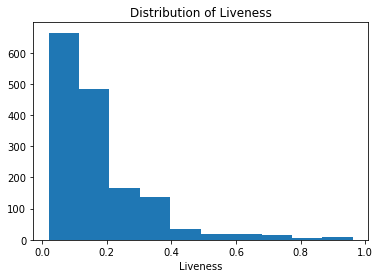

In [29]:
plt.xlabel('Liveness')
plt.title('Distribution of Liveness')
plt.hist(data['liveness'])

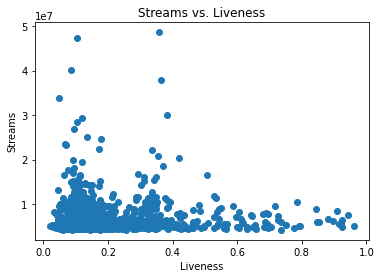

In [65]:
plt.xlabel('Liveness')
plt.ylabel('Streams')
plt.title('Streams vs. Liveness')
plt.scatter(data['liveness'], data['Streams'])

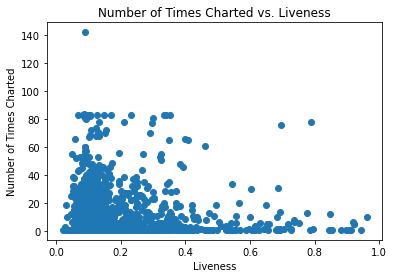

In [30]:
plt.xlabel('Liveness')
plt.ylabel('Number of Times Charted')
plt.title('Number of Times Charted vs. Liveness')
plt.scatter(data['liveness'], data['Number of Times Charted'])

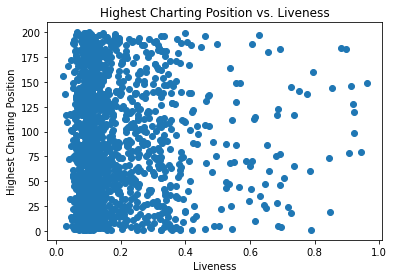

In [31]:
plt.xlabel('Liveness')
plt.ylabel('Highest Charting Position')
plt.title('Highest Charting Position vs. Liveness')
plt.scatter(data['liveness'], data['Highest Charting Position'])

## Valence

(array([ 64., 108., 160., 204., 230., 213., 198., 166., 132.,  79.]),
 array([0.032, 0.127, 0.222, 0.317, 0.412, 0.507, 0.602, 0.697, 0.792,
        0.887, 0.982]),
 <BarContainer object of 10 artists>)

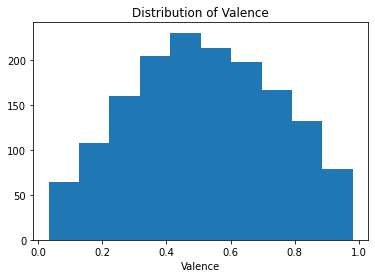

In [32]:
plt.xlabel('Valence')
plt.title('Distribution of Valence')
plt.hist(data['valence'])

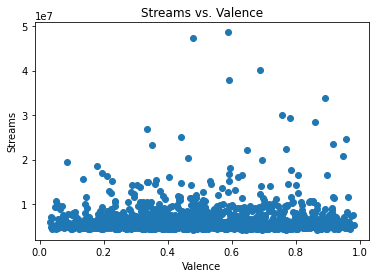

In [66]:
plt.xlabel('Valence')
plt.ylabel('Streams')
plt.title('Streams vs. Valence')
plt.scatter(data['valence'], data['Streams'])

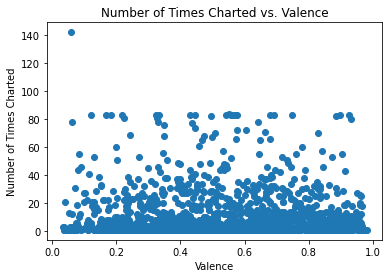

In [33]:
plt.xlabel('Valence')
plt.ylabel('Number of Times Charted')
plt.title('Number of Times Charted vs. Valence')
plt.scatter(data['valence'], data['Number of Times Charted'])

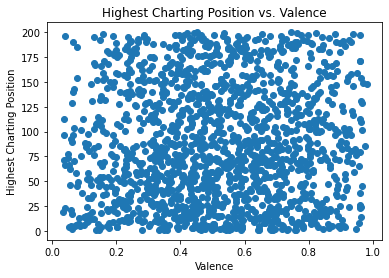

In [34]:
plt.xlabel('Valence')
plt.ylabel('Highest Charting Position')
plt.title('Highest Charting Position vs. Valence')
plt.scatter(data['valence'], data['Highest Charting Position'])

## Tempo

(array([  1.,  69., 254., 262., 284., 253., 198., 135.,  84.,  14.]),
 array([ 46.718 ,  62.5734,  78.4288,  94.2842, 110.1396, 125.995 ,
        141.8504, 157.7058, 173.5612, 189.4166, 205.272 ]),
 <BarContainer object of 10 artists>)

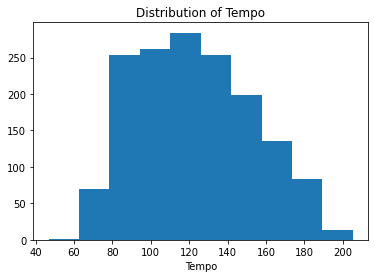

In [35]:
plt.xlabel('Tempo')
plt.title('Distribution of Tempo')
plt.hist(data['tempo'])

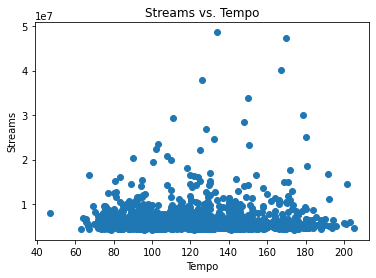

In [67]:
plt.xlabel('Tempo')
plt.ylabel('Streams')
plt.title('Streams vs. Tempo')
plt.scatter(data['tempo'], data['Streams'])

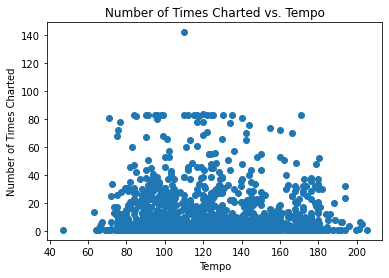

In [36]:
plt.xlabel('Tempo')
plt.ylabel('Number of Times Charted')
plt.title('Number of Times Charted vs. Tempo')
plt.scatter(data['tempo'], data['Number of Times Charted'])

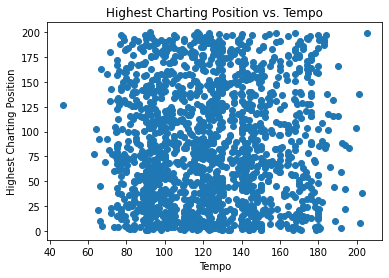

In [37]:
plt.xlabel('Tempo')
plt.ylabel('Highest Charting Position')
plt.title('Highest Charting Position vs. Tempo')
plt.scatter(data['tempo'], data['Highest Charting Position'])

## Duration MS

(array([ 13.,  93., 739., 567., 108.,  26.,   4.,   1.,   2.,   1.]),
 array([ 30133. ,  85933.6, 141734.2, 197534.8, 253335.4, 309136. ,
        364936.6, 420737.2, 476537.8, 532338.4, 588139. ]),
 <BarContainer object of 10 artists>)

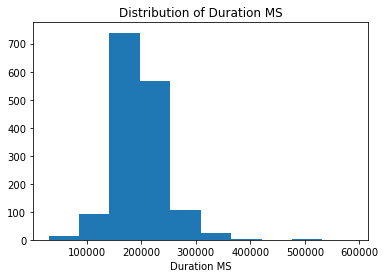

In [38]:
plt.xlabel('Duration MS')
plt.title('Distribution of Duration MS')
plt.hist(data['duration_ms'])

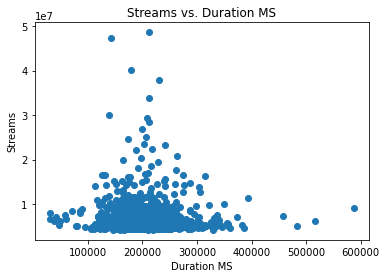

In [68]:
plt.xlabel('Duration MS')
plt.ylabel('Streams')
plt.title('Streams vs. Duration MS')
plt.scatter(data['duration_ms'], data['Streams'])

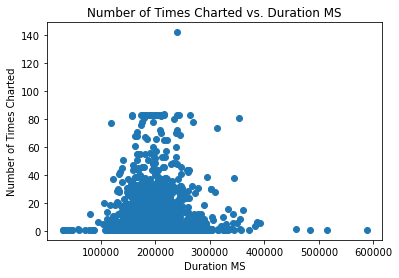

In [39]:
plt.xlabel('Duration MS')
plt.ylabel('Number of Times Charted')
plt.title('Number of Times Charted vs. Duration MS')
plt.scatter(data['duration_ms'], data['Number of Times Charted'])

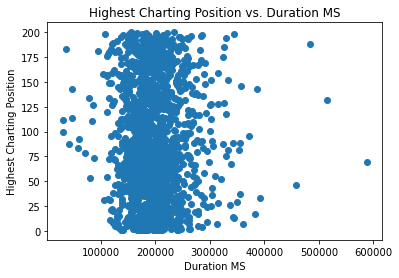

In [40]:
plt.xlabel('Duration MS')
plt.ylabel('Highest Charting Position')
plt.title('Highest Charting Position vs. Duration MS')
plt.scatter(data['duration_ms'], data['Highest Charting Position'])

## Time Signature

(array([   7.,    0.,    0.,    0.,    0.,   54.,    0., 1462.,    0.,
          31.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

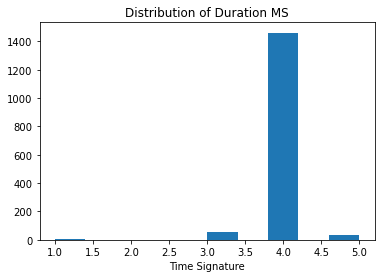

In [41]:
plt.xlabel('Time Signature')
plt.title('Distribution of Duration MS')
plt.hist(data['time_signature'])

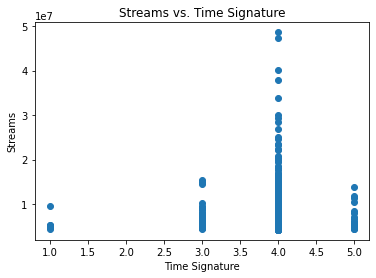

In [69]:
plt.xlabel('Time Signature')
plt.ylabel('Streams')
plt.title('Streams vs. Time Signature')
plt.scatter(data['time_signature'], data['Streams'])

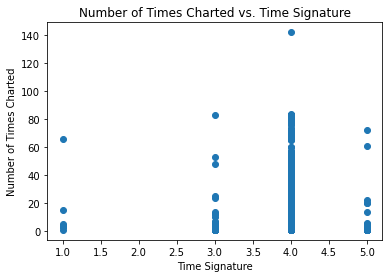

In [42]:
plt.xlabel('Time Signature')
plt.ylabel('Number of Times Charted')
plt.title('Number of Times Charted vs. Time Signature')
plt.scatter(data['time_signature'], data['Number of Times Charted'])

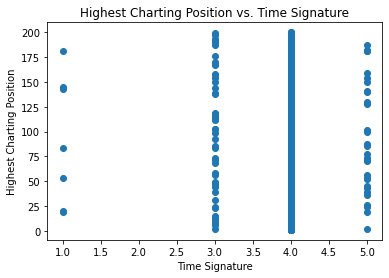

In [43]:
plt.xlabel('Time Signature')
plt.ylabel('Highest Charting Position')
plt.title('Highest Charting Position vs. Time Signature')
plt.scatter(data['time_signature'], data['Highest Charting Position'])

## Streams

(array([1.379e+03, 1.250e+02, 2.800e+01, 7.000e+00, 6.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([ 4176083. ,  8621819.6, 13067556.2, 17513292.8, 21959029.4,
        26404766. , 30850502.6, 35296239.2, 39741975.8, 44187712.4,
        48633449. ]),
 <BarContainer object of 10 artists>)

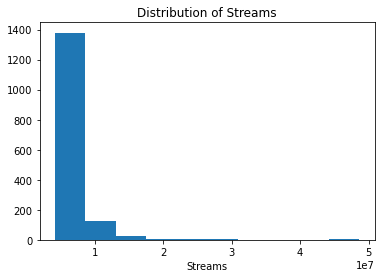

In [70]:
plt.xlabel('Streams')
plt.title('Distribution of Streams')
plt.hist(data['Streams'])

## Highest Charting Position

(array([241., 173., 180., 185., 141., 142., 140., 116., 110., 126.]),
 array([  1. ,  20.9,  40.8,  60.7,  80.6, 100.5, 120.4, 140.3, 160.2,
        180.1, 200. ]),
 <BarContainer object of 10 artists>)

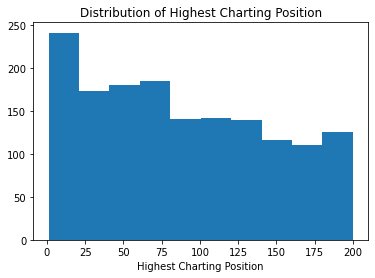

In [44]:
plt.xlabel('Highest Charting Position')
plt.title('Distribution of Highest Charting Position')
plt.hist(data['Highest Charting Position'])

## Number of Times Charted

(array([1.226e+03, 1.700e+02, 7.500e+01, 3.600e+01, 1.400e+01, 3.200e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  15.1,  29.2,  43.3,  57.4,  71.5,  85.6,  99.7, 113.8,
        127.9, 142. ]),
 <BarContainer object of 10 artists>)

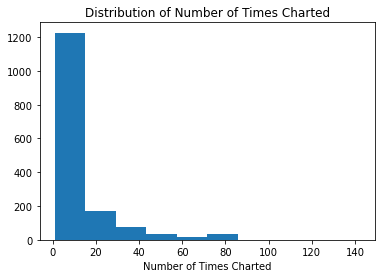

In [45]:
plt.xlabel('Number of Times Charted')
plt.title('Distribution of Number of Times Charted')
plt.hist(data['Number of Times Charted'])

# Creating Popularity Model

To create our popularity heuristic we wanted to balance the three popularity attributes included in our dataset: Streams, Number of Times Charted, and Highest Charting Position. 

In order to balance out highest charting position and number of times charted we decided to divied the latter by the former. This way, songs that charted for a long time and achieved a high level of fame will have a higher score than songs that charted high but only for a short time, or songs that charted relatively low for a long time. 

To factor in streams, we just added a bonus of one point per million streams. 

We believe that this score provides a good heuristic to estimate a songs true popularity, instead of using just one of the possible variables.

In [46]:
data['Streams'] = data['Streams'].replace(',','', regex=True)
data['Streams'] = data['Streams'].astype('int')
score = (data['Number of Times Charted']  / data['Highest Charting Position']) + (data['Streams'] / 1000000)
data['score'] = score
data_score_new = data

In [47]:
data_score_new.sort_values('score',ascending=False).head(10)

,Unnamed: 0,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist Followers,Song ID,Genre,Release Date,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,title,artist,score
24,24,25,1,83,2020-06-12--2020-06-19,15011809,35305637,0VjIjW4GlUZAMYd2vXMi3b,"['canadian contemporary r&b', 'canadian pop', ...",2020-03-20,...,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4,Blinding Lights,The Weeknd,98.011809
79,79,80,1,83,2020-02-14--2020-02-21,7687058,2819593,2XU0oxnq2qxCpomAAuJY8K,"['australian pop', 'pop']",2019-10-17,...,audio_features,1rgnBhdG2JDFTbYkYRZAku,spotify:track:1rgnBhdG2JDFTbYkYRZAku,https://api.spotify.com/v1/tracks/1rgnBhdG2JDF...,https://api.spotify.com/v1/audio-analysis/1rgn...,209755,4,Dance Monkey,Tones And I,90.687058
282,282,283,1,78,2020-02-07--2020-02-14,5145099,6603627,0nbXyq5TXYPCO7pr3N8S4I,"['melodic rap', 'rap', 'trap']",2019-12-06,...,audio_features,0nbXyq5TXYPCO7pr3N8S4I,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653,4,The Box,Roddy Ricch,83.145099
122,122,123,1,67,2020-07-17--2020-07-24,6180056,7593046,7ytR5pFWmSjzHJIeQkgog4,"['north carolina hip hop', 'rap']",2020-04-17,...,audio_features,7ytR5pFWmSjzHJIeQkgog4,spotify:track:7ytR5pFWmSjzHJIeQkgog4,https://api.spotify.com/v1/tracks/7ytR5pFWmSjz...,https://api.spotify.com/v1/audio-analysis/7ytR...,181733,4,ROCKSTAR (feat. Roddy Ricch),DaBaby,73.180056
46,46,47,1,51,2020-10-16--2020-10-23,10222056,1274433,4jPy3l0RUwlUI9T5XHBW2m,['cali rap'],2021-03-26,...,audio_features,4jPy3l0RUwlUI9T5XHBW2m,spotify:track:4jPy3l0RUwlUI9T5XHBW2m,https://api.spotify.com/v1/tracks/4jPy3l0RUwlU...,https://api.spotify.com/v1/audio-analysis/4jPy...,140533,4,Mood (feat. iann dior),24kGoldn,61.222056
273,273,274,1,55,2020-08-07--2020-08-14,5108950,100604,1xQ6trAsedVPCdbtDAmk0c,['nz pop'],2020-06-11,...,audio_features,1xQ6trAsedVPCdbtDAmk0c,spotify:track:1xQ6trAsedVPCdbtDAmk0c,https://api.spotify.com/v1/tracks/1xQ6trAsedVP...,https://api.spotify.com/v1/audio-analysis/1xQ6...,171375,4,Savage Love (Laxed - Siren Beat),"Jawsh 685, Jason Derulo",60.108950
314,314,315,1,55,2020-05-22--2020-05-29,5041656,18572085,24ySl2hOPGCDcxBxFIqWBu,"['dance pop', 'pop', 'post-teen pop']",2020-05-22,...,audio_features,7ju97lgwC2rKQ6wwsf9no9,spotify:track:7ju97lgwC2rKQ6wwsf9no9,https://api.spotify.com/v1/tracks/7ju97lgwC2rK...,https://api.spotify.com/v1/audio-analysis/7ju9...,182200,4,Rain On Me (with Ariana Grande),Lady Gaga,60.041656
0,0,1,1,8,2021-07-23--2021-07-30,48633449,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,audio_features,3Wrjm47oTz2sjIgck11l5e,spotify:track:3Wrjm47oTz2sjIgck11l5e,https://api.spotify.com/v1/tracks/3Wrjm47oTz2s...,https://api.spotify.com/v1/audio-analysis/3Wrj...,211560,4,Beggin',Måneskin,56.633449
168,168,169,1,51,2020-09-11--2020-09-18,5386268,17353707,4Oun2ylbjFKMPTiaSbbCih,"['dance pop', 'pop', 'pop rap', 'rap']",2020-08-07,...,audio_features,4Oun2ylbjFKMPTiaSbbCih,spotify:track:4Oun2ylbjFKMPTiaSbbCih,https://api.spotify.com/v1/tracks/4Oun2ylbjFKM...,https://api.spotify.com/v1/audio-analysis/4Oun...,187541,4,WAP (feat. Megan Thee Stallion),Cardi B,56.386268
2,2,3,1,11,2021-06-25--2021-07-02,40162559,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,audio_features,4ZtFanR9U6ndgddUvNcjcG,spotify:track:4ZtFanR9U6ndgddUvNcjcG,https://api.spotify.com/v1/tracks/4ZtFanR9U6nd...,https://api.spotify.com/v1/audio-analysis/4ZtF...,178147,4,good 4 u,Olivia Rodrigo,51.162559


In [48]:
data_score_new['score'].describe()

count    1554.000000
mean        7.595292
std         7.100164
min         4.233826
25%         5.093273
50%         5.644320
75%         7.233379
max        98.011809
Name: score, dtype: float64

Text(0.5, 1.0, 'Distribution of Score')

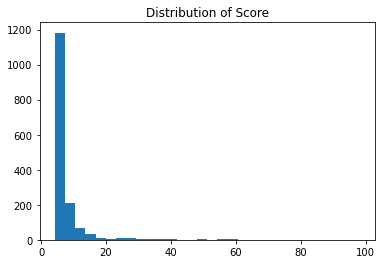

In [49]:
plt.hist(data_score_new['score'], bins = 30)
plt.title('Distribution of Score')

# Data

We will be using the "data_score_new" dataframe. This dataframe will be split into a training and testing split.

In [50]:
testlist=list(data_score_new['track_href'][0:50])
testlist.append('https://open.spotify.com/track/0FE9t6xYkqWXU2ahLh6D8X?si=1107ff1ff66a4280')

# Models

We will include valence, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, tempo, duration_ms, time_signature. 


We tested linear regression models, GAMs, Lasso models, Ridge models, KNN models, and Random Forest models. The code for the first 5 models are in an R markdown file called "Final Project", and the code for the Random Forest model is written in the "Hypertuned RF" notebook.

## Popularity Function

In [51]:
# Using data_score_new

In [52]:
os.environ['SPOTIPY_CLIENT_ID']='bf70bf6d43e44bbeaca6aa7d724aa18d'
os.environ['SPOTIPY_CLIENT_SECRET']='b1b9fd3f9fc94b97a1fc9978c4725334'

In [53]:
def popularity(urls):
    
    # model=sm.OLS(endog=data_score_new['score'],exog=data_score_new[['valence','danceability','energy','key','mode','loudness','acousticness','instrumentalness','liveness','tempo','duration_ms','time_signature','speechiness']]).fit()
    
    rf = RandomForestRegressor(n_estimators = 1000, max_depth = 2, max_features = 3, bootstrap = True, oob_score = True,random_state=123)
    fitted_model=rf.fit(data_score_new[['acousticness','loudness','time_signature','mode', 'key','instrumentalness']],data_score_new['score'])
    features=pd.DataFrame()
    
    for i in range(0,len(urls)):
        auth_manager=SpotifyClientCredentials()
        sp = spotipy.Spotify(auth_manager=auth_manager)
        d = sp.audio_features(urls[i])
        features=features.append(d)
        
    songvector=[]
    scorevector=[]
    
    for i in range(0,len(features)):
        scorevector.append(fitted_model.predict(np.array(features.iloc[i,:][['acousticness','loudness','time_signature','mode', 'key','instrumentalness']]).reshape(1,-1)))
        songvector.append(sp.track(list(features['track_href'])[i])['name'])
        
    finalframe=pd.DataFrame([songvector,scorevector]).T.rename(columns={0:'Track name',1:'Score'})
    finalframe=finalframe.sort_values('Score',ascending=False).reset_index(drop=True)
    rankvector=list(range(len(finalframe)+1))[1:]
    
    finalframe['rank']=rankvector
    
    score=[]
    for i in range(0,len(finalframe)):
        score.append(round(finalframe['Score'][i][0],2))
    finalframe['score']=score
    finalframe=finalframe.drop(columns='Score')     
    for i in range(0,len(finalframe)-1):
        if finalframe['score'][i]==finalframe['score'][i+1]:
            finalframe.iloc[i+1,1]=finalframe.iloc[i,1]
    return finalframe

In [54]:
import warnings
warnings.filterwarnings("ignore")
popularity(testlist)

Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/3Wrjm47oTz2sjIgck11l5e
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/5PjdY0CKGZdEuoNab3yDmX
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/4ZtFanR9U6ndgddUvNcjcG
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/6PQ88X9TkUIAUIZJHW2upE
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/5Z9KJZvQzH6PFmb8SNkxuk
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/67BtfxlNbhBmCDR2L2l8qd
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/3DarAbFujv6eYNliUTyqtz
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/5RwV8BvLfX5injfqYodke9
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/2JPLbjOn0wPCngEot2STUS
Expected id of type track but found type tracks https:/

Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/0jdso14vaFnpRazMLEZovF
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/7MAibcTli4IisCtbHKrGMh
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/1058fW9H3fZA6QjYCdOBad
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/5JCoSi02qi3jJeHdZXMmR8
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/2rCbl9naJYhaxjLsfx88uM
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/6UelLqGlWMcVH1E5c4H7lY
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/1JXBNvlDEl2epKSJ9EOgKX
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/18vXApRmJSgQ6wG2ll9AOg
Expected id of type track but found type tracks https://api.spotify.com/v1/tracks/0k4d5YPDr1r7FX77VdqWez
Expected id of type track but found type tracks https:/

,Track name,rank,score
0,Blinding Lights,1,13.97
1,I WANNA BE YOUR SLAVE,2,8.87
2,traitor,3,8.40
3,Save Your Tears (with Ariana Grande) (Remix),4,8.24
4,INDUSTRY BABY (feat. Jack Harlow),5,8.23
5,drivers license,6,8.15
6,Kiss Me More (feat. SZA),7,8.14
7,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,8,8.11
8,Mood (feat. iann dior),9,8.06
9,Levitating (feat. DaBaby),10,8.04


In [56]:
# rf = RandomForestRegressor(n_estimators = 1000, max_depth = 2, max_features = 3, bootstrap = True, oob_score = True,random_state=123)
# fitted_model=rf.fit(data_score_new[['acousticness','loudness','time_signature','mode', 'key','instrumentalness']],data_score_new['score'])
# fitted_model.predict()